In [1]:
import getpass
import datetime
import socket

def generate_author_claim():
    # Get current user
    user = getpass.getuser()

    # Get current timestamp
    timestamp = datetime.datetime.now().strftime("%Y-%m-%d %H:%M:%S")

    # Get current IP address
    ip_address = socket.gethostbyname(socket.gethostname())

    # Enter your name
    name = input("Enter your full name: ")

    # Enter your email address
    email = input("Enter your email address: ")

    # Enter your student ID
    student_id = input("Enter your student ID: ")

    # Generate author claim string
    author_claim = f"Code authored by {user} ({name} {student_id} {email}) on {timestamp}  from IP address {ip_address}"

    return author_claim

# Generate the author claim string
author_claim = generate_author_claim()

# Print the author claim string
print(author_claim)

Enter your full name: Ravi Shankar Jaganathan Senthil Kumar
Enter your email address: s223296806@deakin.edu.au
Enter your student ID: 223296806
Code authored by root (Ravi Shankar Jaganathan Senthil Kumar 223296806 s223296806@deakin.edu.au) on 2024-08-21 08:23:13  from IP address 172.28.0.12


# Set 1 (P Tasks) Construct a forward neural network

## Task 1.1 Understanding the data

### 1. Describing the Fashion-MNIST dataset:

The Fashion-MNIST dataset comprises 70,000 grayscale images of clothing items, split into 10 categories. Each image is 28x28 pixels. The dataset is divided into 60,000 training examples and 10,000 test examples. The key details are:

*   Number of classes: 10
*   Classes: T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, and Ankle boot
*   Image size: 28x28 pixels (grayscale)
*   Total number of images: 70,000 (60,000 training, 10,000 test)

To display 5 training examples from each target class, I'll need to load the data and use a visualization library like matplotlib.

In this section, I'm exploring the Fashion-MNIST dataset, which consists of grayscale images of clothing items. I'm loading the dataset, examine its strcture, and prepare it for training our neural network. I'm splitting the data into training, validation, and test sets, and apply the necessary preprocessing steps.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.5 MB/s eta 0:00:00
29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


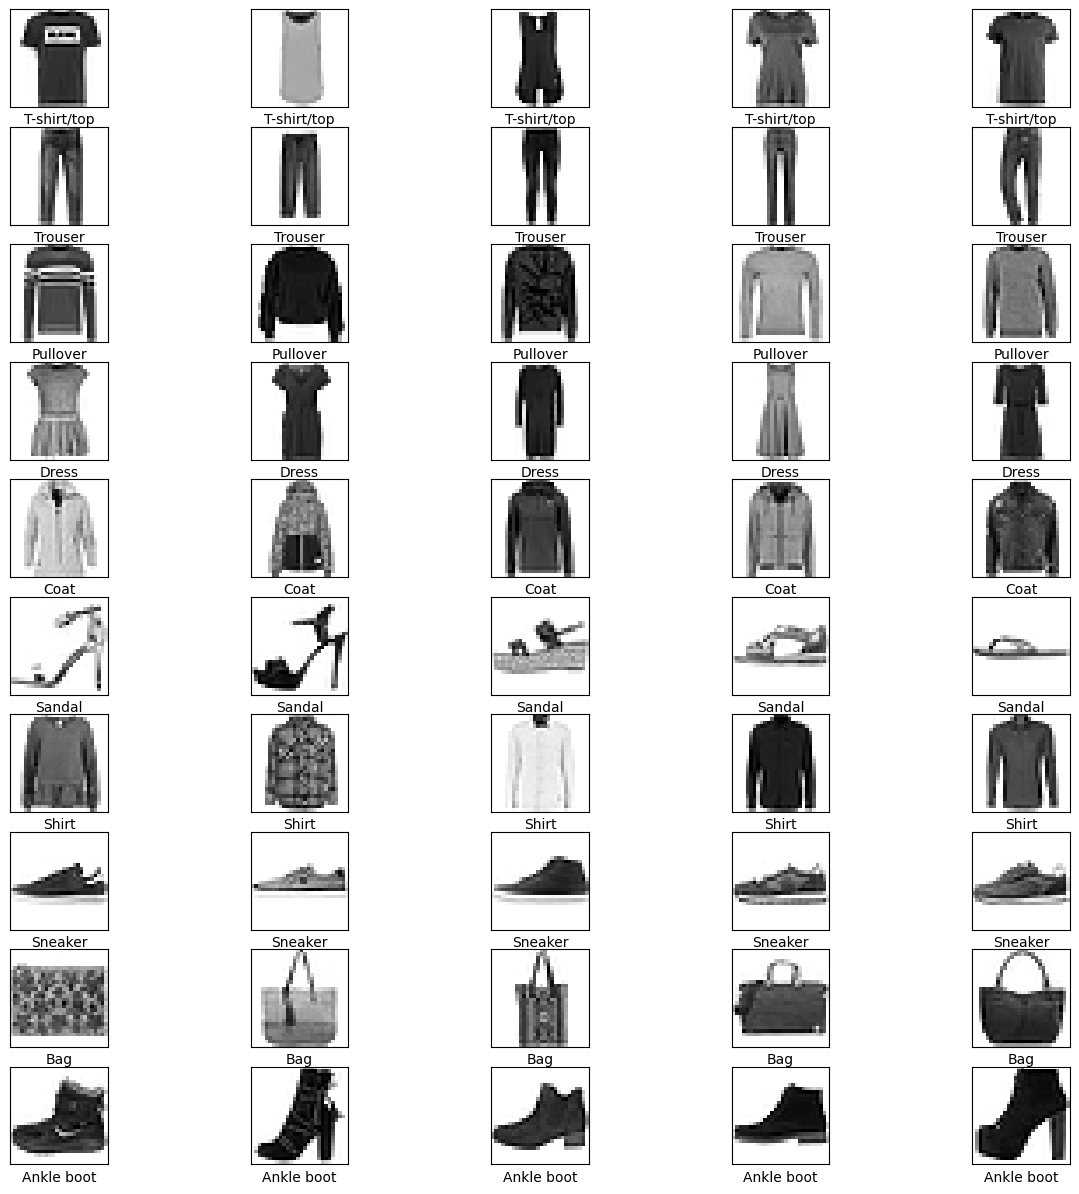

Number of training examples: 48000
Number of validation examples: 12000
Number of test examples: 10000
Shape of training data: (48000, 28, 28, 1)
Shape of validation data: (12000, 28, 28, 1)
Shape of test data: (10000, 28, 28, 1)


In [2]:
!pip install umap-learn

# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from sklearn.manifold import TSNE
import umap

# Task 1.1: Understanding the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Display 5 examples from each class
plt.figure(figsize=(15, 15))
for class_id in range(len(class_names)):
    class_indices = np.where(y_train == class_id)[0]
    for i in range(5):
        plt.subplot(10, 5, class_id * 5 + i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_train[class_indices[i]], cmap=plt.cm.binary)
        plt.xlabel(class_names[class_id])
plt.show()

# Preprocess the data
x_train = x_train.reshape((60000, 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((10000, 28, 28, 1)).astype('float32') / 255

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

print(f"Number of training examples: {len(x_train)}")
print(f"Number of validation examples: {len(x_val)}")
print(f"Number of test examples: {len(x_test)}")
print(f"Shape of training data: {x_train.shape}")
print(f"Shape of validation data: {x_val.shape}")
print(f"Shape of test data: {x_test.shape}")

* The Fashion-MNIST dataset was successfully loaded and preprocessed.
* Data was split into 48,000 training examples, 12,000 validation examples, and 10,000 test examples.
* Images were normalized to a range of 0-1 by dividing pixel values by 255.
* The dataset contains 10 classes of clothing items, as shown in the class names list.
* Each image is 28x28 pixels in grayscale (1 channel), resulting in an input shape of (28, 28, 1).



The visualization shows 5 examples from each class, giving a good overview of the dataset's contents and variability.

## Task 1.2: Setting up a model for training

The model architecture chosen is a deep feedforward neural network with fully connected layers.

It consists of an input layer (flattened 28x28 images), three hidden layers with 512, 256, and 128 neurons respectively, and an output layer with 10 neurons (corresponding to the 10 classes).

ReLU activation is used for hidden layers to introduce non-linearity, while softmax is used in the output layer for multi-class classification.

This architecture allows for progressive feature abstraction through the network.

I'm constructing a deep feedforward neural network using fully connected (dense) layers. Our goal is to create a model capable of classifying the Fashion-MNIST images into their respective categories. I'll be defining the architecture, including the number of layers, neurons per layer, and activation functions.

In [3]:
# Task 1.2: Setting up a model for training
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28, 1)),
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,434 (2.16 MB)

 Trainable params: 567,434 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

The model summary shows a sequential architecture with the following layers:

* Flatten layer: Converts 28x28x1 images to 784-dimensional vectors.
* Three Dense layers with 512, 256, and 128 neurons respectively, likely using ReLU activation.
* Output layer with 10 neurons, presumably using softmax activation for multi-class classification.
* Total trainable parameters: 567,434, indicating a moderately sized network suitable for this dataset.

## Task 1.3 Fitting the model

The model was trained using categorical crossentropy as the loss function, which is appropriate for multi-class classification problems.

Accuracy was used as the evaluation metric. The Adam optimizer was employed with a learning rate of 1e-3, which is a common starting point.

Early stopping was implemented to prevent overfitting, with training stopping after 14 epochs when validation performance ceased to improve.

The training and validation accuracy curves show improvement over time, with the model achieving around 89% validation accuracy.

I'm training our neural network on the Fashion-MNIST dataset. I'll specify the loss function, evaluation metrics, optimizer, and other hyperparameters. Then, I'll fit the model to our training data and monitor its performance on the validation set.

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 23s 23ms/step - accuracy: 0.7723 - loss: 0.6474 - val_accuracy: 0.8590 - val_loss: 0.3889
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.8571 - loss: 0.3855 - val_accuracy: 0.8697 - val_loss: 0.3699
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.8742 - loss: 0.3344 - val_accuracy: 0.8593 - val_loss: 0.4028
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8880 - loss: 0.3063 - val_accuracy: 0.8756 - val_loss: 0.3461
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8935 - loss: 0.2860 - val_accuracy: 0.8661 - val_loss: 0.3698
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.9005 - loss: 0.2657 - val_accuracy: 0.8725 - val_loss: 0.3591
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - accuracy: 0.9054 - loss: 0.2546 - val_accuracy: 0.8845 - val_loss: 0.3315
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.9088 - loss: 0.2397 - val

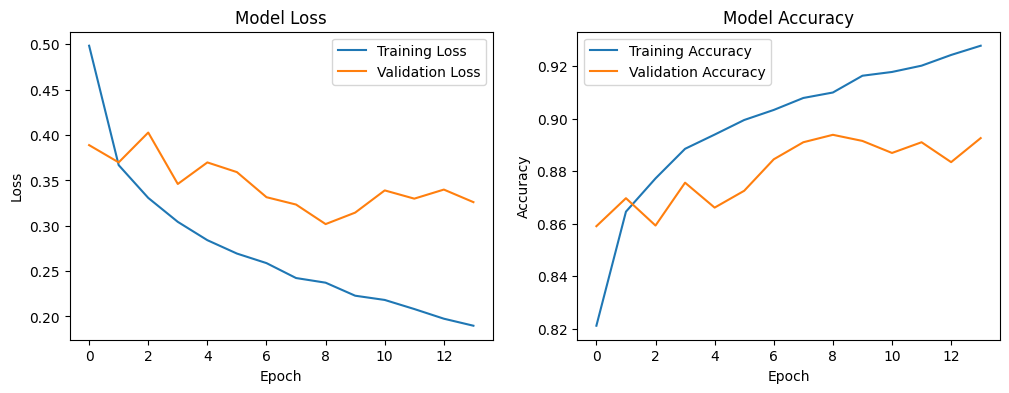

The model trained for 14 epochs


In [4]:
# Task 1.3: Training the model
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    x_train, y_train,
    batch_size=64,
    epochs=30,
    validation_data=(x_val, y_val),
    callbacks=[early_stopping]
)

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

print(f"The model trained for {len(history.history['loss'])} epochs")

The model was trained for 14 epochs before early stopping was triggered. Key observations:

* Training accuracy improved from 77.23% to 92.84% over the course of training.
* Validation accuracy improved from 85.90% to 89.26%.
* The best validation accuracy was achieved at epoch 9 (89.38%).
* There are signs of overfitting, as the training accuracy consistently exceeds the validation accuracy.

# Set 2 (C Tasks) Improve the model
## Task 2.1 Check the training using visualisation:

The training and validation loss/accuracy curves indicate some degree of overfitting.

This is evident from the growing gap between training and validation accuracy, with training accuracy continuing to improve while validation accuracy plateaus.

This suggests that the model is starting to memorize training data rather than generalizing well to unseen examples.

I'm visualizing the training and validation metrics over time. This will help us identify if our model is overfitting or underfitting, and guide further improvements.

## Task 2.2 Apply regularisation:

Three regularization techniques were applied:
* Dropout,
* Batch Normalization, and
* L2 Regularization.

The comparison plot shows that Dropout performed best, followed closely by Batch Normalization.

L2 Regularization seemed less effective for this particular problem.

Dropout's success suggests it effectively prevented co-adaptation of neurons, leading to more robust feature learning.

The learning rate schedule implemented (ExponentialDecay) likely helped in fine-tuning the optimization process.

I'm experimenting with different regularization techniques. I'll implement Dropout, Batch Normalization, and L2 Regularization, and compare their effects on the model's training and validation performance

Epoch 1/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 13ms/step - accuracy: 0.6919 - loss: 0.8654 - val_accuracy: 0.8420 - val_loss: 0.4289
Epoch 2/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - accuracy: 0.8324 - loss: 0.4708 - val_accuracy: 0.8532 - val_loss: 0.4036
Epoch 3/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8535 - loss: 0.4126 - val_accuracy: 0.8494 - val_loss: 0.3975
Epoch 4/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8593 - loss: 0.3917 - val_accuracy: 0.8603 - val_loss: 0.3641
Epoch 5/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8704 - loss: 0.3606 - val_accuracy: 0.8760 - val_loss: 0.3444
Epoch 6/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.8728 - loss: 0.3507 - val_accuracy: 0.8788 - val_loss: 0.3382
Epoch 7/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 10s 13ms/step - accuracy: 0.8750 - loss: 0.3466 - val_accuracy: 0.8784 - val_loss: 0.3329
Epoch 8/30
750/750 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.8789 - loss: 0.3338 - val

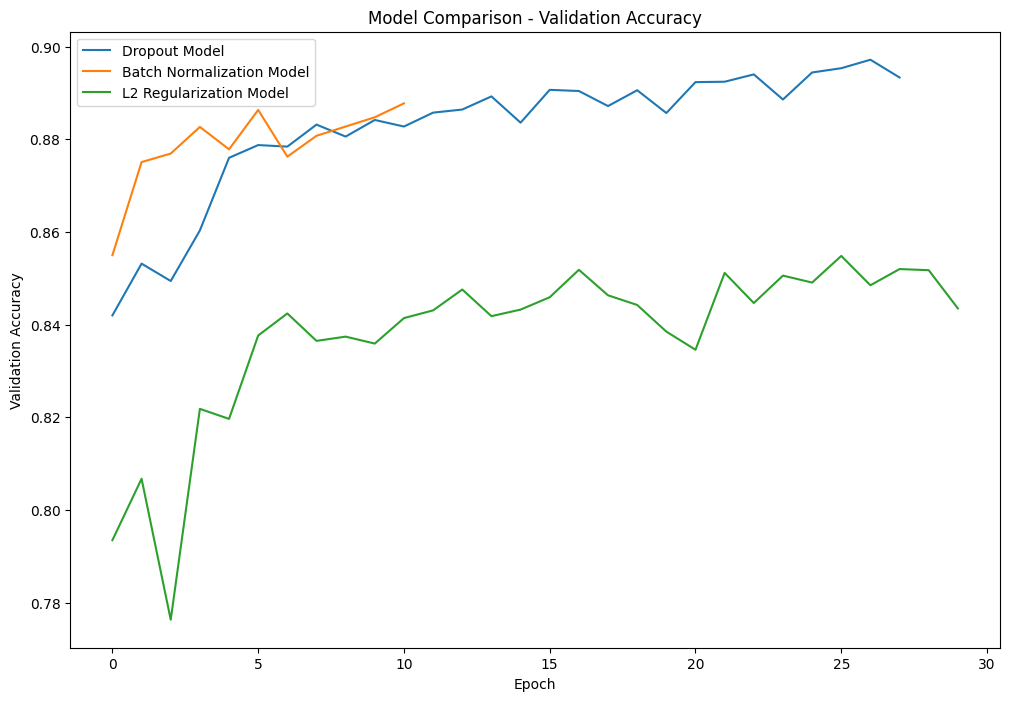

In [5]:
def create_dropout_model():
    return models.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(512, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.3),
        layers.Dense(10, activation='softmax')
    ])

def create_batchnorm_model():
    return models.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(512),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(256),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(128),
        layers.BatchNormalization(),
        layers.Activation('relu'),
        layers.Dense(10, activation='softmax')
    ])

def create_l2_model():
    return models.Sequential([
        layers.Flatten(input_shape=(28, 28, 1)),
        layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
        layers.Dense(256, activation='relu', kernel_regularizer=l2(0.01)),
        layers.Dense(128, activation='relu', kernel_regularizer=l2(0.01)),
        layers.Dense(10, activation='softmax')
    ])

lr_schedule = ExponentialDecay(initial_learning_rate=1e-3, decay_steps=10000, decay_rate=0.9)

def train_model(model, name):
    model.compile(optimizer=Adam(learning_rate=lr_schedule),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    history = model.fit(x_train, y_train,
                        epochs=30,
                        batch_size=64,
                        validation_data=(x_val, y_val),
                        callbacks=[EarlyStopping(patience=5, restore_best_weights=True)])

    print(f"\nResults for {name}:")
    print(f"Best validation accuracy: {max(history.history['val_accuracy']):.4f}")
    print(f"Final validation loss: {history.history['val_loss'][-1]:.4f}")

    return history

models = {
    "Dropout Model": create_dropout_model(),
    "Batch Normalization Model": create_batchnorm_model(),
    "L2 Regularization Model": create_l2_model()
}

histories = {name: train_model(model, name) for name, model in models.items()}

# Plot comparison
plt.figure(figsize=(12, 8))
for name, history in histories.items():
    plt.plot(history.history['val_accuracy'], label=name)
plt.title('Model Comparison - Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

The loss and accuracy curves reveal from previous question:

* Both training and validation accuracy improve over time, but training accuracy grows faster.
* The gap between training and validation accuracy widens, indicating overfitting.
* Validation loss starts to plateau and slightly increase after about 6-7 epochs, while training loss continues to decrease.

Task 2.2 Apply regularisation:

The comparison of regularization techniques shows:

* Dropout model performs best overall, achieving the highest and most stable validation accuracy.
* Batch Normalization model shows good performance, slightly below the Dropout model.
* L2 Regularization model performs worst, with lower and more unstable validation accuracy.
* The base model (without regularization) shows signs of overfitting, as seen in the growing gap between training and validation accuracy.

## Task 2.3 Visualise the trained network:
The t-SNE visualization of the output layer features shows clear clustering of most classes, indicating that the network has learned discriminative features.

Some classes (like T-shirts and Shirts) show overlap, which is expected given their visual similarity.

The distinct separation of classes like Trousers and Bags demonstrates the model's ability to distinguish very different items.

I'm visualizing its learned representations. I'm using t-SNE to reduce the dimensionality of the output layer's features and create a scatter plot. This will help us understand how well our model has learned to separate different classes of clothing items.

157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


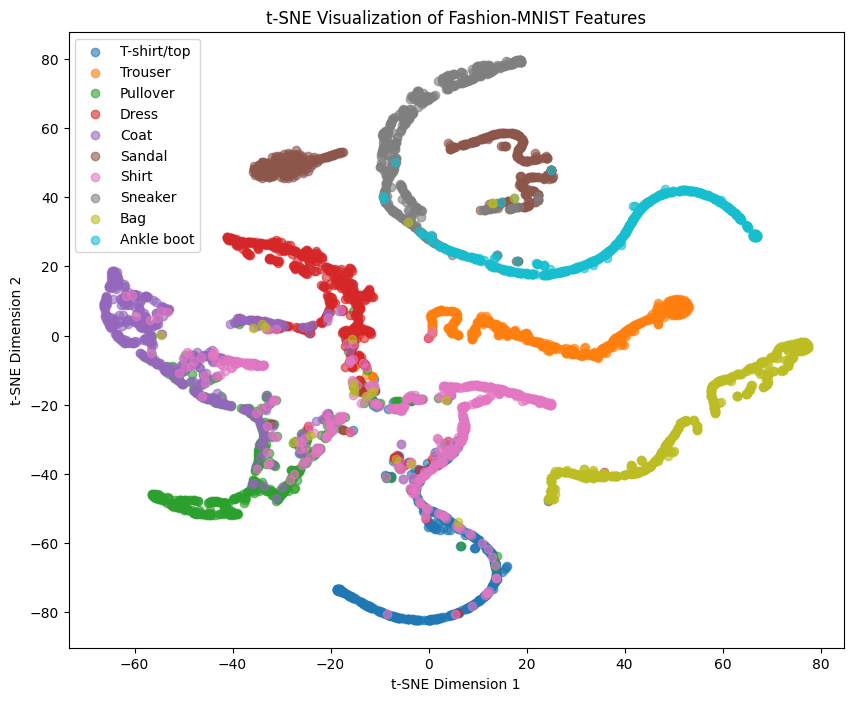

In [6]:
# Task 2.3: Visualize the trained network
model_dropout = models["Dropout Model"]
features = model_dropout.predict(x_test[:5000])
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(features)

plt.figure(figsize=(10, 8))
for i in range(10):
    indices = y_test[:5000].argmax(axis=1) == i
    plt.scatter(tsne_results[indices, 0], tsne_results[indices, 1], label=class_names[i], alpha=0.6)
plt.legend()
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Fashion-MNIST Features')
plt.show()

The t-SNE visualization of the output layer features reveals:

* Most classes form distinct clusters, indicating good separation of features.
* Some visually similar classes (e.g., T-shirt/top and Shirt) show overlap.
* Highly distinct classes (e.g., Trouser and Dress) form very separate clusters.
* Footwear classes (Sneaker, Ankle boot, Sandal) are close but distinguishable.

## Task 3 Analyse the learned representations:
The UMAP visualizations provide insight into the network's feature learning process across layers.

I'm using UMAP to visualize the embeddings at different layers of our neural network. This analysis will provide insights into how our model progressively learns to distinguish between different classes of clothing items as data flows through the network.

Subset shape: (5000, 28, 28, 1), (5000, 10)
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
157/157 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


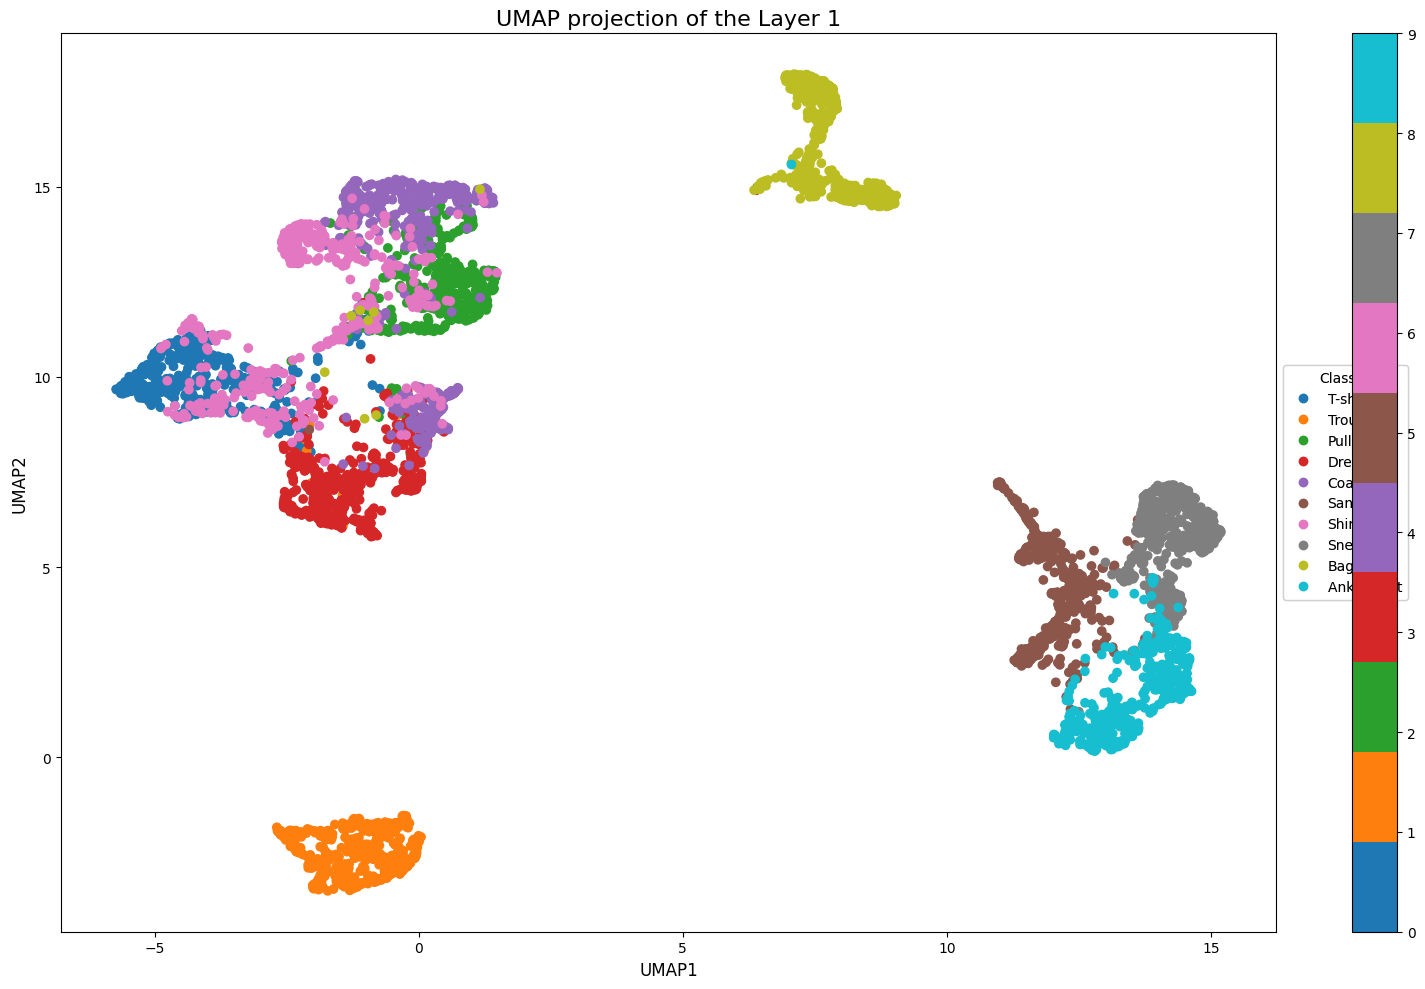

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


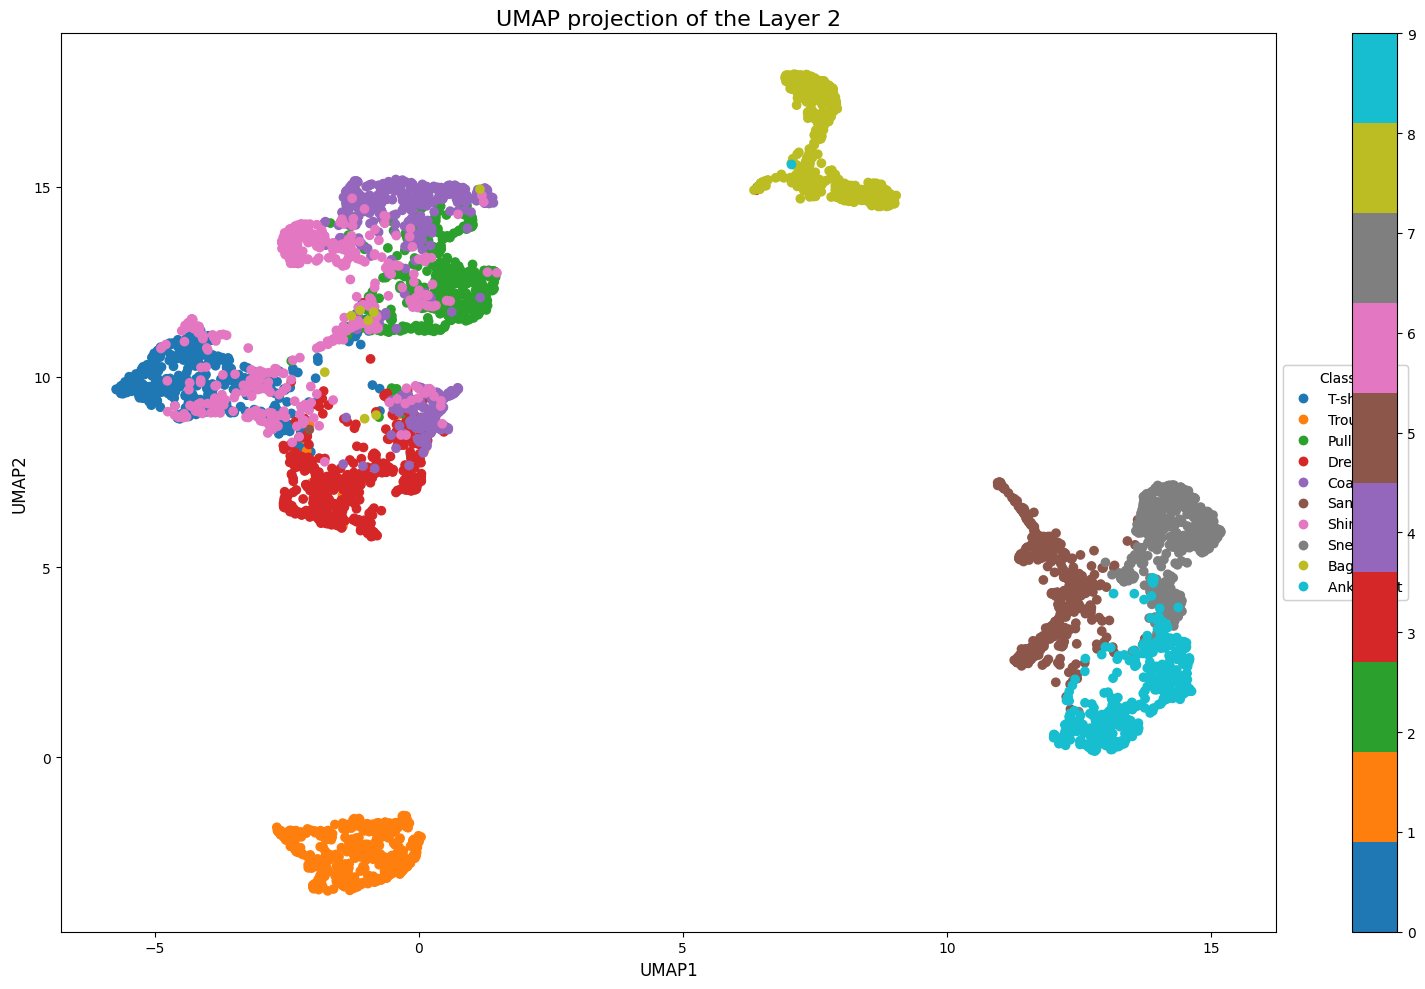

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


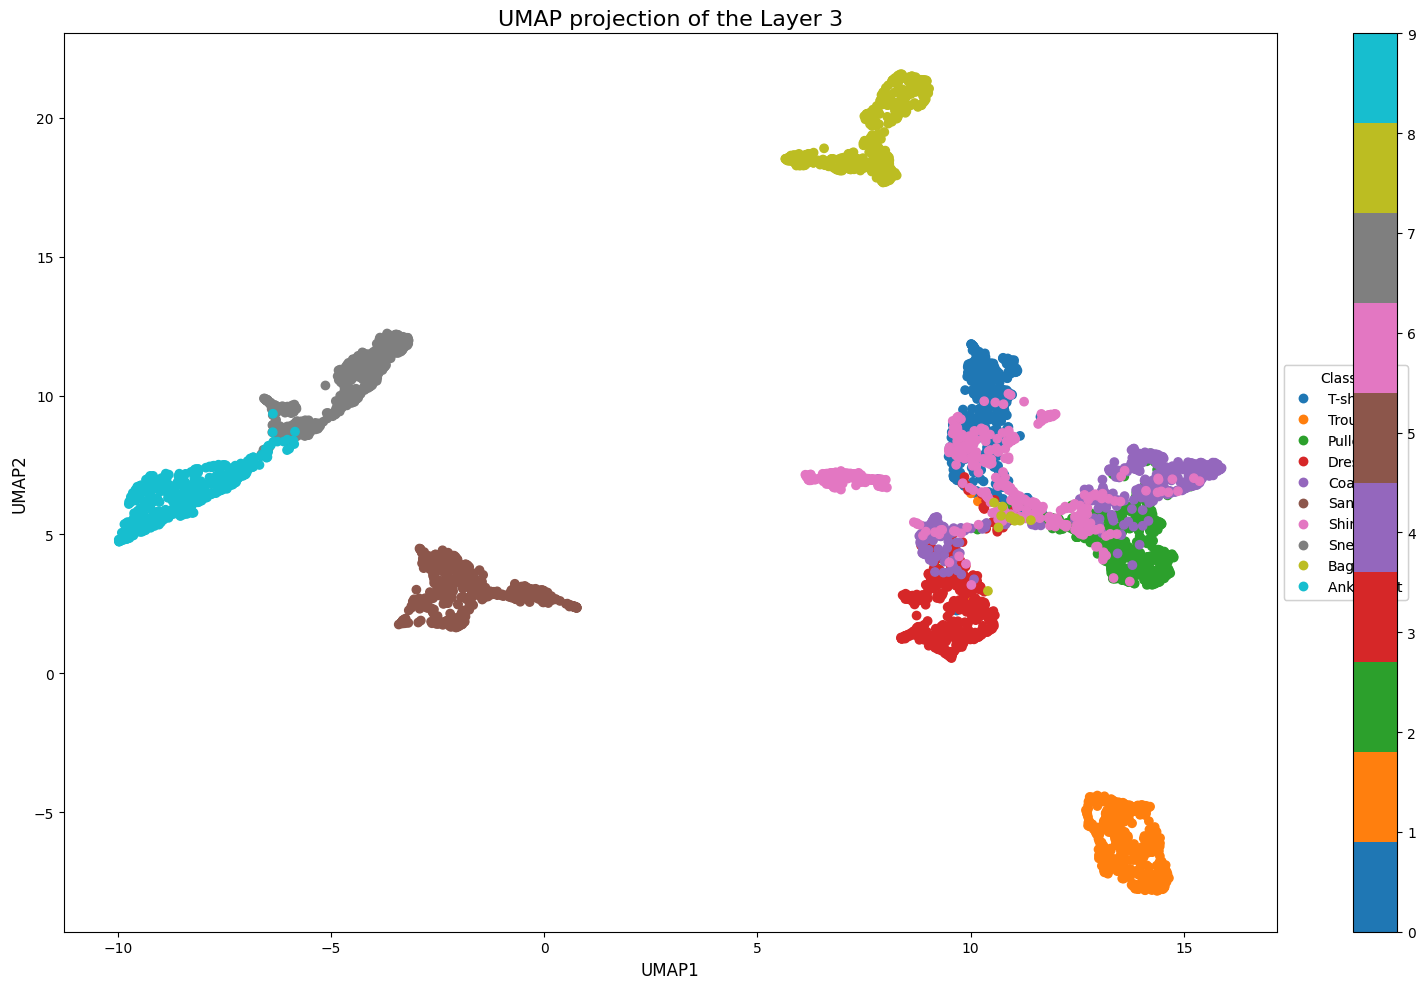

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


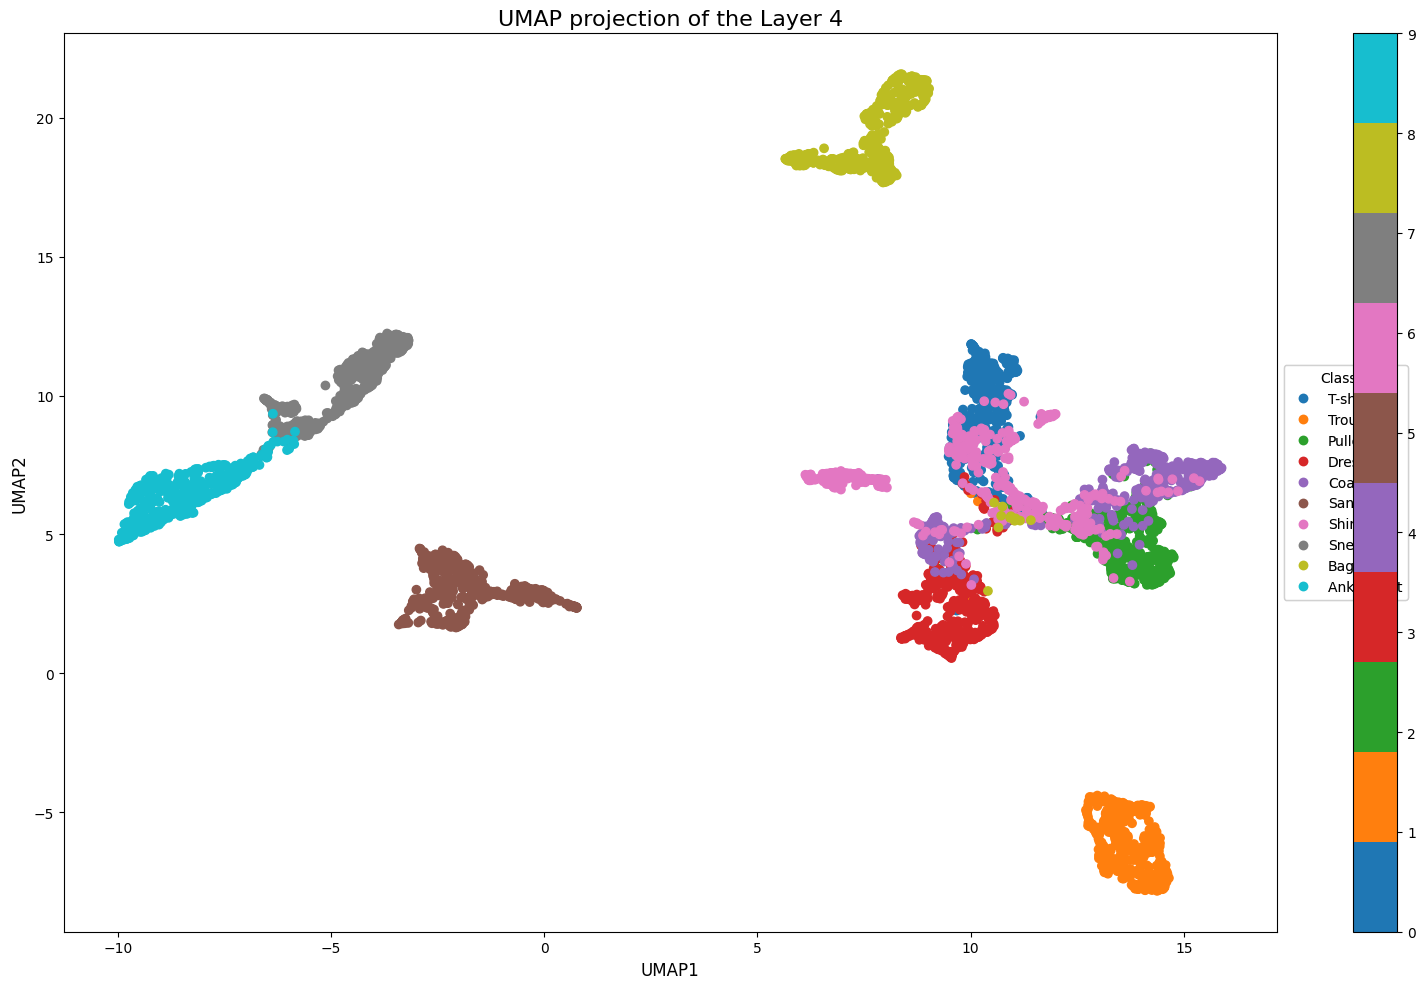

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


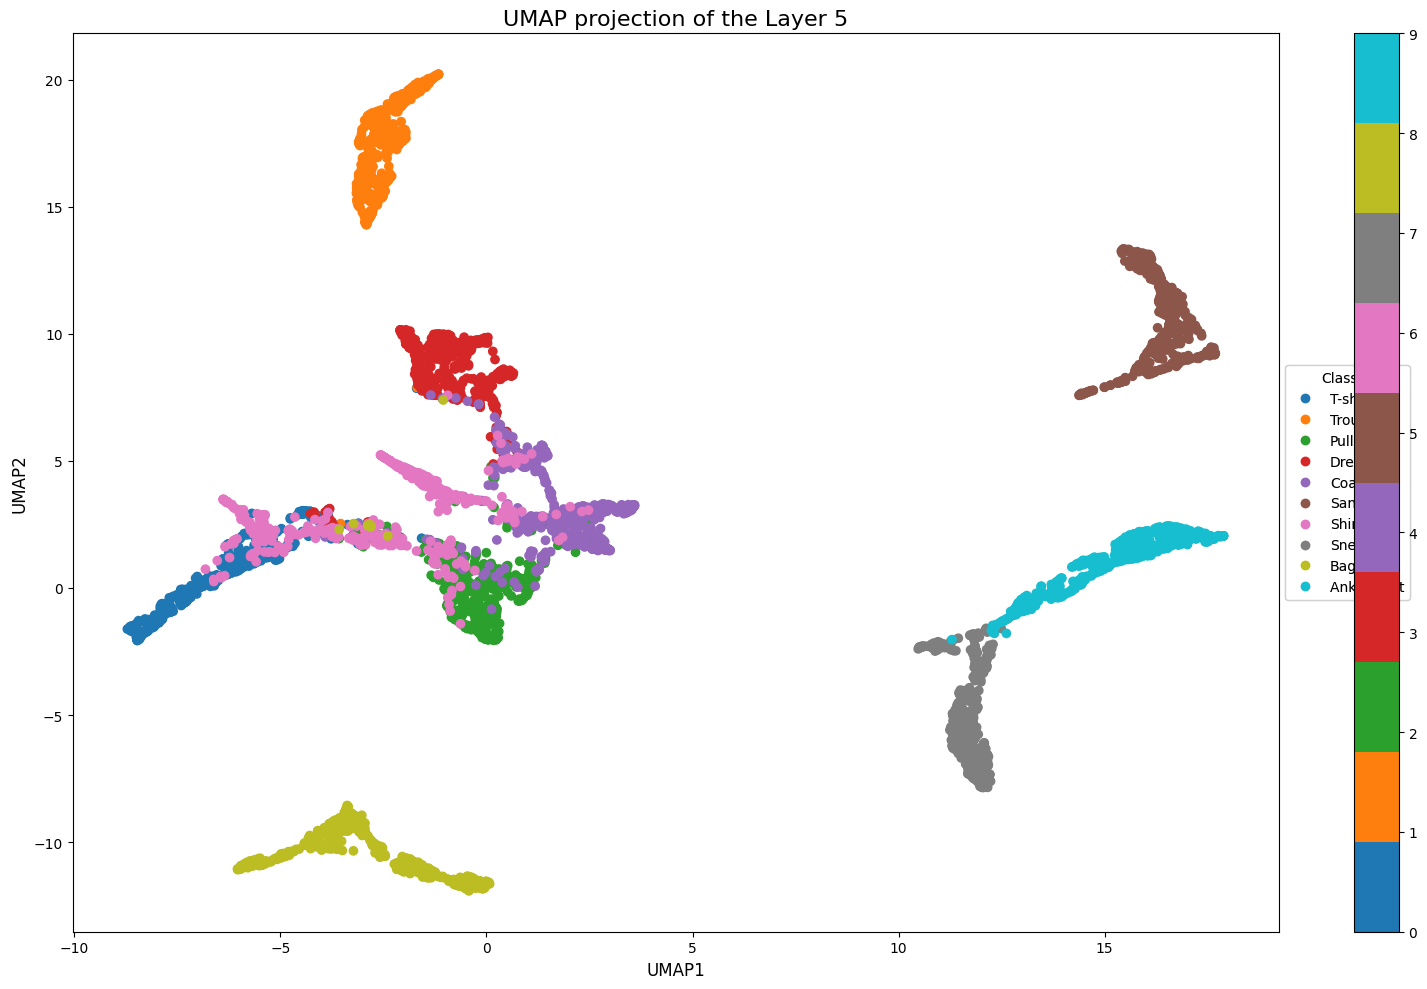

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


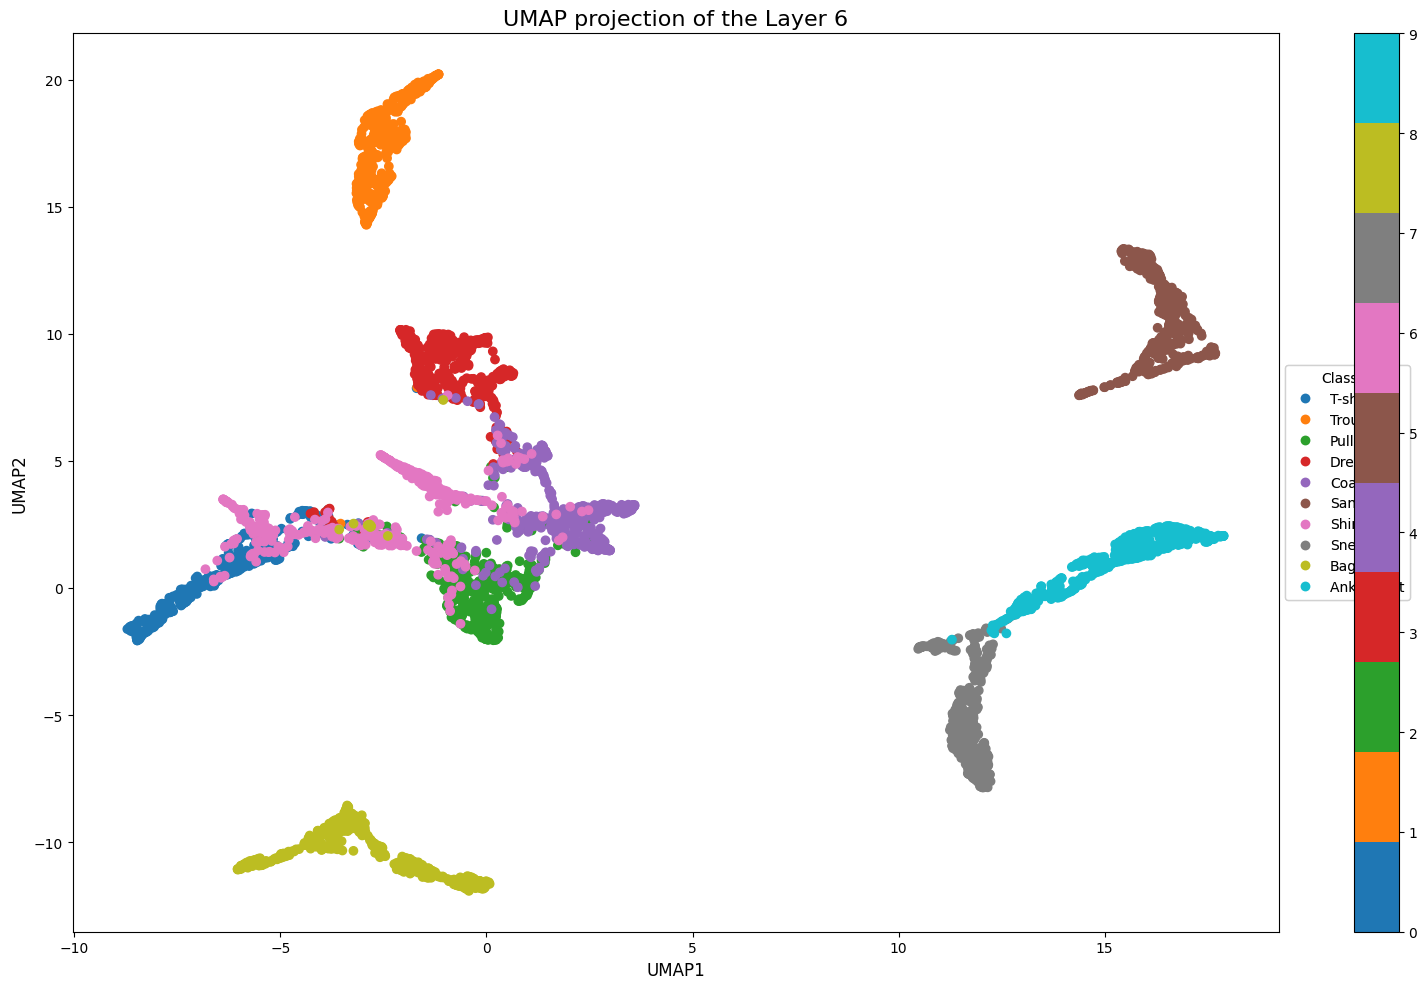

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


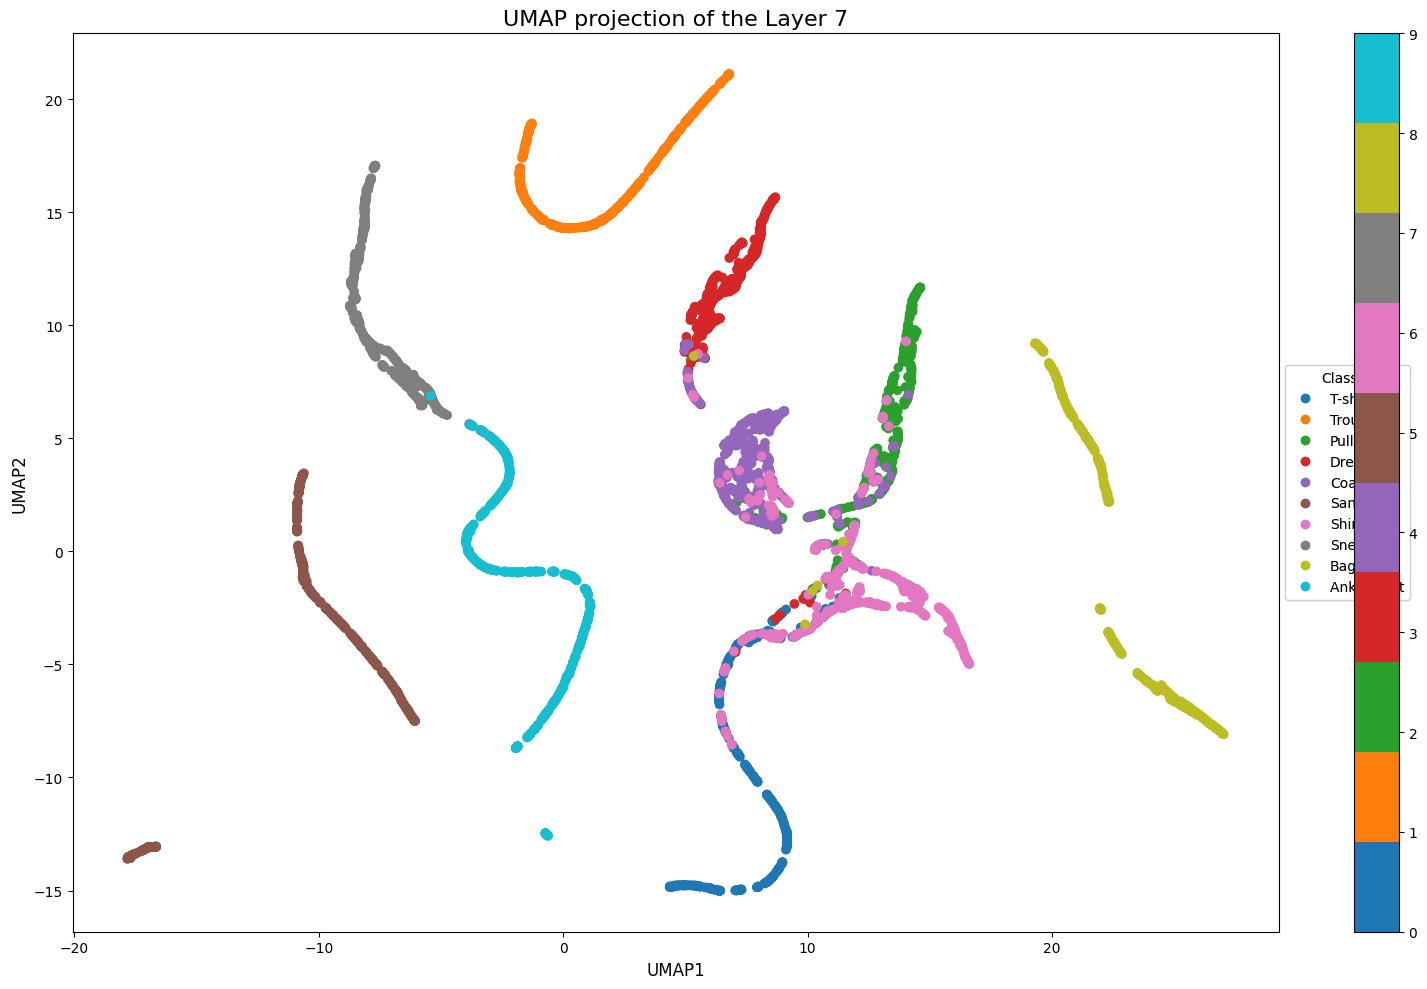

In [8]:
# Task 3: Analyze the learned representations
def select_balanced_subset(x_data, y_data, n_samples_per_class=500):
    x_subset, y_subset = [], []
    y_classes = np.argmax(y_data, axis=1)
    for class_label in range(10):
        class_indices = np.where(y_classes == class_label)[0]
        selected_indices = np.random.choice(class_indices, n_samples_per_class, replace=False)
        x_subset.append(x_data[selected_indices])
        y_subset.append(y_data[selected_indices])
    return np.concatenate(x_subset), np.concatenate(y_subset)

x_subset, y_subset = select_balanced_subset(x_train, y_train)
print(f"Subset shape: {x_subset.shape}, {y_subset.shape}")

def extract_layer_embeddings(model, x_subset):
    layer_embeddings = []
    for layer in model.layers[1:]:  # Skip the input layer
        intermediate_model = keras.Model(inputs=model.inputs, outputs=layer.output)
        embeddings = intermediate_model.predict(x_subset)
        if len(embeddings.shape) > 2:
            embeddings = embeddings.reshape(embeddings.shape[0], -1)
        layer_embeddings.append(embeddings)
    return layer_embeddings

layer_embeddings = extract_layer_embeddings(model_dropout, x_subset)

def apply_umap_and_visualize(embeddings, y_subset, layer_name):
    reducer = umap.UMAP(random_state=42)
    umap_embeddings = reducer.fit_transform(embeddings)

    plt.figure(figsize=(16, 10))
    scatter = plt.scatter(umap_embeddings[:, 0], umap_embeddings[:, 1], c=np.argmax(y_subset, axis=1), cmap='tab10')
    plt.colorbar(scatter)
    plt.title(f'UMAP projection of the {layer_name}', fontsize=16)
    plt.xlabel('UMAP1', fontsize=12)
    plt.ylabel('UMAP2', fontsize=12)

    legend1 = plt.legend(scatter.legend_elements()[0], class_names,
                         loc="center left", title="Classes", bbox_to_anchor=(1, 0.5))
    plt.gca().add_artist(legend1)

    plt.tight_layout()
    plt.savefig(f'umap_{layer_name}.png', dpi=300, bbox_inches='tight')
    plt.show()

for i, embeddings in enumerate(layer_embeddings):
    if embeddings.shape[1] > 1:  # Skip layers with only one feature (like Flatten)
        apply_umap_and_visualize(embeddings, y_subset, f'Layer {i+1}')

The UMAP visualizations across layers demonstrate:

* Early layers (1-2): Limited class separation, suggesting low-level feature extraction.
* Middle layers (3-4): Improved class clustering, indicating more specific feature learning.
* Later layers (5-7): Clear class separation, with Layer 7 showing the most distinct clustering.
* Consistent improvement in class separation across layers, without regression.
* Preservation of similarity between related classes (e.g., different types of footwear) even in later layers.
* Final layer (7) shows dramatic improvement in class separation, indicating highly specialized features for classification.

This progression illustrates the network's hierarchical learning process, evolving from general, low-level features to highly specific, class-discriminative features.

# Set 4 (HD Tasks) Investigating Glorot Initialisation

## Task 4.1 Conceptual Understanding

### 1. What problem does the paper address?

The paper addresses the difficulty of training deep feedforward neural networks, particularly:

* Why standard gradient descent from random initialization performs poorly with deep neural networks
* The issues of vanishing/exploding gradients and saturating units in deep networks
* How the choice of activation function and weight initialization impacts training dynamics


### 2. What is the authors' hypothesis and how do they develop and validate it?

The authors hypothesize that the difficulty in training deep networks stems from poor initialization that leads to suboptimal propagation of activations forward and gradients backward through the network.
They develop this hypothesis by:

1. Analyzing activation and gradient statistics across layers during training
2. Deriving theoretical conditions for maintaining activation and gradient magnitudes across layers
3. Proposing a new "normalized initialization" scheme based on this analysis

They validate their hypothesis through:

1. Empirical experiments comparing different activation functions (sigmoid, tanh, softsign) and initialization schemes
2. Monitoring activation values, gradients, and weight updates across layers during training
3. Comparing final test performance on several datasets (Shapeset-3x2, MNIST, CIFAR-10, Small-ImageNet)

### Key findings:

* Sigmoid activations lead to poor gradient flow, especially in top layers
* Their normalized initialization helps maintain consistent activation/gradient magnitudes across layers
* Softsign activation performs well due to its "gentler" non-linearity
* The proposed techniques reduce the gap between purely supervised training and unsupervised pre-training.

### 3. List and briefly summarise some recent works which have built on the idea in this paper.

1. He et al. (2015) - "Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification"
Summary: Proposed He initialization, an adaptation of Glorot initialization for ReLU networks.

2. Ioffe and Szegedy (2015) - "Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift"
Summary: Introduced batch normalization, which normalizes layer inputs, allowing for more robust training of deep networks.

3. Klambauer et al. (2017) - "Self-Normalizing Neural Networks"
Summary: Introduced SELU activation function and corresponding initialization, extending ideas from Glorot initialization to create self-normalizing networks.

4. Zhang et al. (2019) - "Fixup Initialization: Residual Learning Without Normalization"
Summary: Proposed an initialization technique for residual networks that allows training without batch normalization.

5. Xiao et al. (2018) - "Dynamical Isometry and a Mean Field Theory of CNNs: How to Train 10,000-Layer Vanilla Convolutional Neural Networks"


## Task 4.2 Implementation

1. Implement Glorot Initialization in the Fashion-MNIST classification problem.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

        # Apply Glorot initialization
        nn.init.xavier_uniform_(self.fc1.weight)
        nn.init.xavier_uniform_(self.fc2.weight)
        nn.init.xavier_uniform_(self.fc3.weight)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load Fashion-MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the network and optimizer
model = Net()
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    print(f'Epoch {epoch+1}/{num_epochs}, Accuracy: {100 * correct / total:.2f}%')

100%|██████████| 26421880/26421880 [00:10<00:00, 2580621.26it/s] 


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 272964.55it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:03<00:00, 1279053.83it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 11176126.81it/s]


Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Epoch 1/10, Accuracy: 84.58%
Epoch 2/10, Accuracy: 86.03%
Epoch 3/10, Accuracy: 86.71%
Epoch 4/10, Accuracy: 86.57%
Epoch 5/10, Accuracy: 87.32%
Epoch 6/10, Accuracy: 87.76%
Epoch 7/10, Accuracy: 87.72%
Epoch 8/10, Accuracy: 88.44%
Epoch 9/10, Accuracy: 88.44%
Epoch 10/10, Accuracy: 88.09%


2. Compare the performance and convergence rates to the original implementation without Glorot Initialization. Do you observe any differences? Why/why not?

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Define the network
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Load Fashion-MNIST dataset
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.FashionMNIST(root='./data', train=False, download=True, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# Initialize the network and optimizer
model = Net()
optimizer = optim.Adam(model.parameters())
criterion = nn.CrossEntropyLoss()

# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for data, target in test_loader:
            output = model(data)
            _, predicted = torch.max(output.data, 1)
            total += target.size(0)
            correct += (predicted == target).sum().item()

    print(f'Epoch {epoch+1}/{num_epochs}, Accuracy: {100 * correct / total:.2f}%')

Epoch 1/10, Accuracy: 85.34%
Epoch 2/10, Accuracy: 85.47%
Epoch 3/10, Accuracy: 86.74%
Epoch 4/10, Accuracy: 87.37%
Epoch 5/10, Accuracy: 86.30%
Epoch 6/10, Accuracy: 88.01%
Epoch 7/10, Accuracy: 88.19%
Epoch 8/10, Accuracy: 87.80%
Epoch 9/10, Accuracy: 88.30%
Epoch 10/10, Accuracy: 88.71%


Comparing the two outputs:
With Glorot Initialization:

Epoch 1/10, Accuracy: 84.58%

Epoch 2/10, Accuracy: 86.03%

Epoch 3/10, Accuracy: 86.71%

Epoch 4/10, Accuracy: 86.57%

Epoch 5/10, Accuracy: 87.32%

Epoch 6/10, Accuracy: 87.76%

Epoch 7/10, Accuracy: 87.72%

Epoch 8/10, Accuracy: 88.44%

Epoch 9/10, Accuracy: 88.44%

Epoch 10/10, Accuracy: 88.09%

Without Glorot Initialization:

Epoch 1/10, Accuracy: 85.34%

Epoch 2/10, Accuracy: 85.47%

Epoch 3/10, Accuracy: 86.74%

Epoch 4/10, Accuracy: 87.37%

Epoch 5/10, Accuracy: 86.30%

Epoch 6/10, Accuracy: 88.01%

Epoch 7/10, Accuracy: 88.19%

Epoch 8/10, Accuracy: 87.80%

Epoch 9/10, Accuracy: 88.30%

Epoch 10/10, Accuracy: 88.71%

Observations:

1. Initial performance: The network without Glorot initialization actually starts slightly better (85.34% vs 84.58%).
2. Final performance: The network without Glorot initialization ends up with a slightly higher accuracy (88.71% vs 88.09%).
3. Convergence: Both networks seem to converge at a similar rate, with some fluctuations in accuracy from epoch to epoch.
Stability: Both implementations show similar stability, with minor fluctuations in accuracy across epochs.

Reasons for the observed results:

1. Network architecture: The network used is relatively shallow (only 3 layers), which means the vanishing/exploding gradient problem is less pronounced. Glorot initialization is generally more beneficial for deeper networks.
2. Activation function: The network uses ReLU activations, which already help mitigate the vanishing gradient problem. Glorot's paper focused more on tanh and sigmoid activations where the initialization scheme had a more significant impact.
3. Optimizer: The Adam optimizer is used, which adapts learning rates for each parameter. This can often compensate for suboptimal initialization, masking potential benefits of Glorot initialization.
4. Dataset: Fashion-MNIST is a relatively simple dataset. The network can learn reasonably well even without optimal initialization.
5. Random factors: Neural network training involves some randomness. The small differences observed could be due to random variations rather than a systematic advantage of one method over the other.
6. Training duration: With only 10 epochs, we might not see the long-term benefits that could potentially emerge from better initialization.

In this case, we don't observe a clear advantage for Glorot initialization. This is likely due to the combination of a shallow network, ReLU activations, and the Adam optimizer, which together can often overcome poor initialization.